In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_gs = pd.read_csv("../logs/memory-usage/gs-manual.txt", sep=", ", engine="python")
df_dense = pd.read_csv("../logs/memory-usage/dense-manual.txt", sep=", ", engine="python")
df_sparse = pd.read_csv("../logs/memory-usage/sparse-manual.txt", sep=", ", engine="python")
df_newton = pd.read_csv("../logs/memory-usage/newton-manual.txt", sep=", ", engine="python")

In [3]:
df_gs.columns

Index(['N', 'start', 'end'], dtype='object')

In [4]:
df_gs["memory"] = df_gs["end"] - df_gs["start"]
df_dense["memory"] = df_dense["end"] - df_dense["start"]
df_sparse["memory"] = df_sparse["end"] - df_sparse["start"]
df_newton["memory"] = df_newton["end"] - df_newton["start"]

In [5]:
df_sparse

,N,start,end,memory
0,7,110.964844,111.921875,0.957031
1,14,110.832031,111.812500,0.980469
2,28,111.464844,112.679688,1.214844
3,56,113.152344,116.984375,3.832031
4,84,115.937500,122.542969,6.605469
5,112,119.875000,133.765625,13.890625
6,224,147.734375,212.500000,64.765625
7,336,193.566406,357.113281,163.546875
8,448,259.429688,563.566406,304.136719
9,672,0.000000,770.062500,770.062500


In [6]:
df_gs["N"].values

array([  7,  14,  28,  56,  84, 112])

In [7]:
df_dense

,N,start,end,memory
0,7,110.910156,112.156250,1.246094
1,14,110.964844,112.457031,1.492188
2,28,113.148438,118.367188,5.218750
3,56,125.750000,166.070312,40.320312
4,84,146.503906,338.667969,192.164062
5,112,177.730469,774.691406,596.960938


In [8]:
df_newton = df_newton.sort_values("N")
df_newton

,N,start,end,memory
0,7,110.742188,110.742188,0.000000
1,14,110.667969,110.875000,0.207031
2,28,110.476562,112.003906,1.527344
3,56,110.886719,113.976562,3.089844
4,84,111.476562,114.968750,3.492188
5,112,111.792969,116.675781,4.882812
6,168,112.613281,121.207031,8.593750
7,224,113.421875,123.921875,10.500000
8,280,114.660156,127.000000,12.339844
9,336,115.765625,194.578125,78.812500


In [9]:
df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       10 non-null     int64  
 1   start   10 non-null     float64
 2   end     10 non-null     float64
 3   memory  10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 448.0 bytes


# Plots

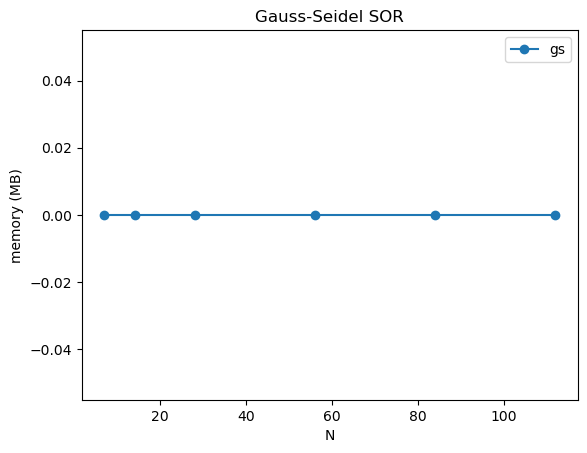

In [10]:
plt.plot(df_gs["N"], df_gs["memory"], label="gs", marker="o")

plt.title("Gauss-Seidel SOR")
plt.xlabel("N")
plt.ylabel("memory (MB)")
plt.legend()
plt.show()

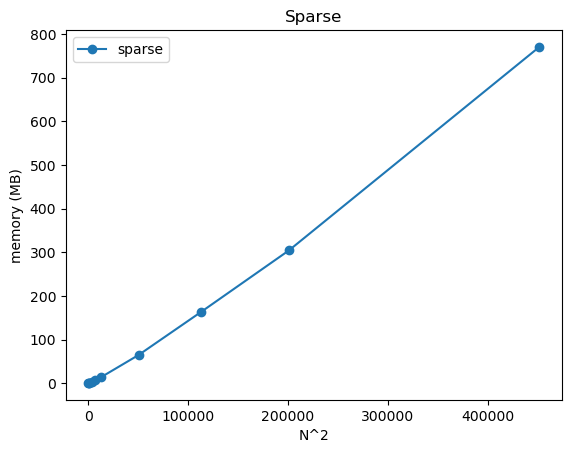

In [11]:
plt.plot(df_sparse["N"]**2, df_sparse["memory"], label="sparse", marker="o")

plt.title("Sparse")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
plt.show()

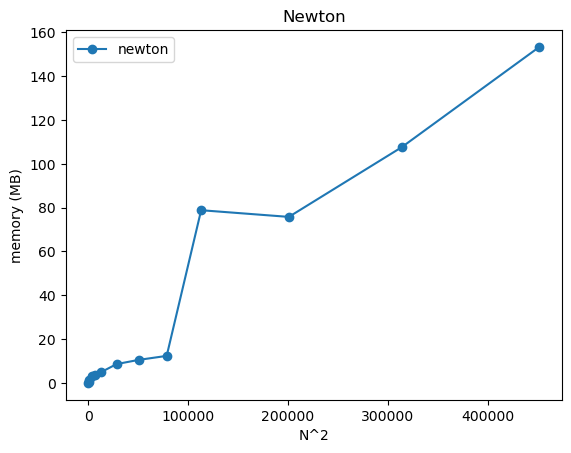

In [12]:
plt.plot(df_newton["N"]**2, df_newton["memory"], label="newton", marker="o")

plt.title("Newton")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
plt.show()

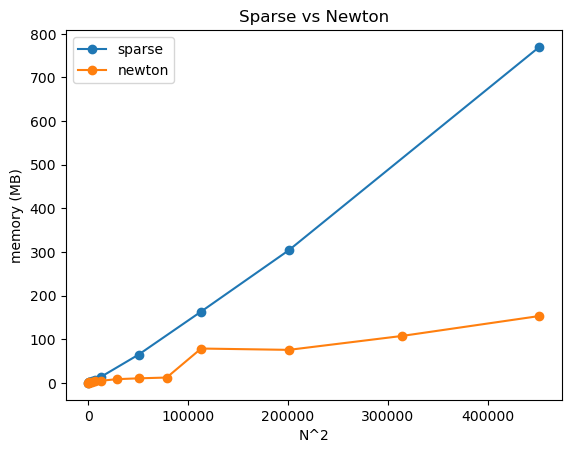

In [14]:
plt.plot(df_sparse["N"] ** 2, df_sparse["memory"], label="sparse", marker="o")
plt.plot(df_newton["N"] ** 2, df_newton["memory"], label="newton", marker="o")

plt.title("Sparse vs Newton")
plt.xlabel("N^2")
plt.ylabel("memory (MB)")
plt.legend()
plt.show()

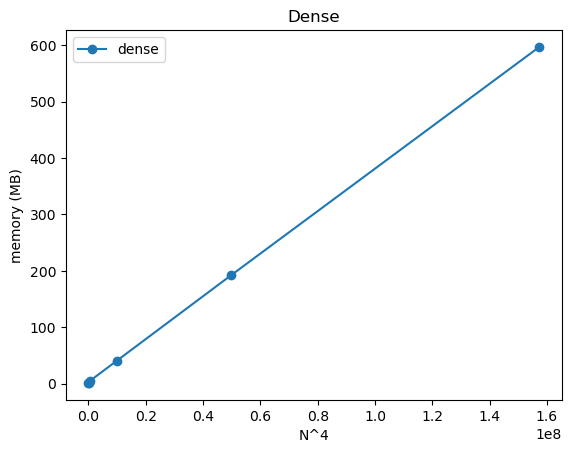

In [15]:
plt.plot(df_dense["N"]**4, df_dense["memory"], label="dense", marker="o")

plt.title("Dense")
plt.xlabel("N^4")
plt.ylabel("memory (MB)")
plt.legend()
plt.show()